# This notebook contains the code to reproduce Figures 3 (c), (d) and A.4 in the paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn import linear_model

from sklearn.model_selection import train_test_split

import shap
import lime

import facct_util as futil

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load and prepare the data

In [3]:
cancer = sklearn.datasets.load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, train_size=0.8, random_state=0)

### Linear regression

In [4]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, Y_train)

sklearn.metrics.accuracy_score(Y_test, lin_regr.predict(X_test) > 0.5)

0.9649122807017544

### Linear regression with random training labels

In [5]:
np.random.seed(0)
Y_random_train = np.random.choice([0, 1], size=len(Y_train))

In [6]:
lin_regr_random = linear_model.LinearRegression()
lin_regr_random.fit(X_train, Y_random_train)

sklearn.metrics.accuracy_score(Y_test, lin_regr_random.predict(X_test) > 0.5)

0.35964912280701755

### Explanation Algorithms

In [7]:
X_train_summary = shap.kmeans(X_train, 50) 

# real labels
shap_explainer = shap.KernelExplainer(lin_regr.predict, X_train_summary)

# random labels
random_shap_explainer = shap.KernelExplainer(lin_regr_random.predict, X_train_summary)

### Plots: Figures 3 (c), (d) and A.3 in the paper

In [8]:
sns.set_style("whitegrid")
sns.set_context("notebook", rc={'axes.linewidth': 3, 'grid.linewidth': 1.5},  font_scale=3.5)

In [9]:
y_labels = ['' for _ in range(30)]
y_labels[0] = 'F1'
y_labels[10] = 'F10'
y_labels[20] = 'F20'
y_labels[29] = 'F30'
for i in [5, 15, 25]:
    y_labels[i] = '...'

---------------------- Example 0 ----------------------
trained prediction: 0. random prediction: 1. True label: 0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


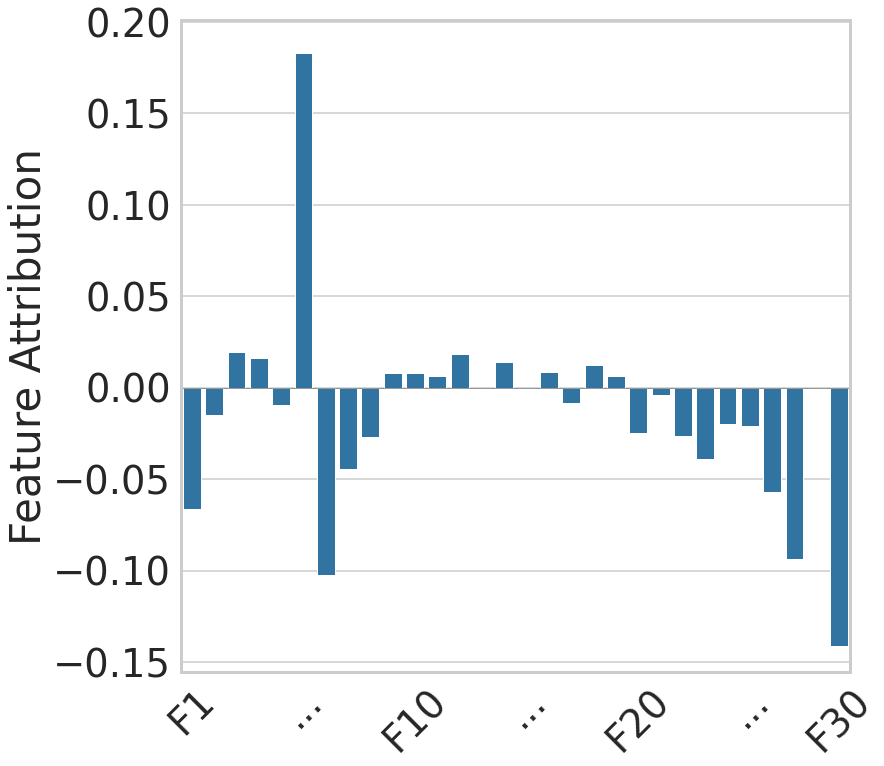

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


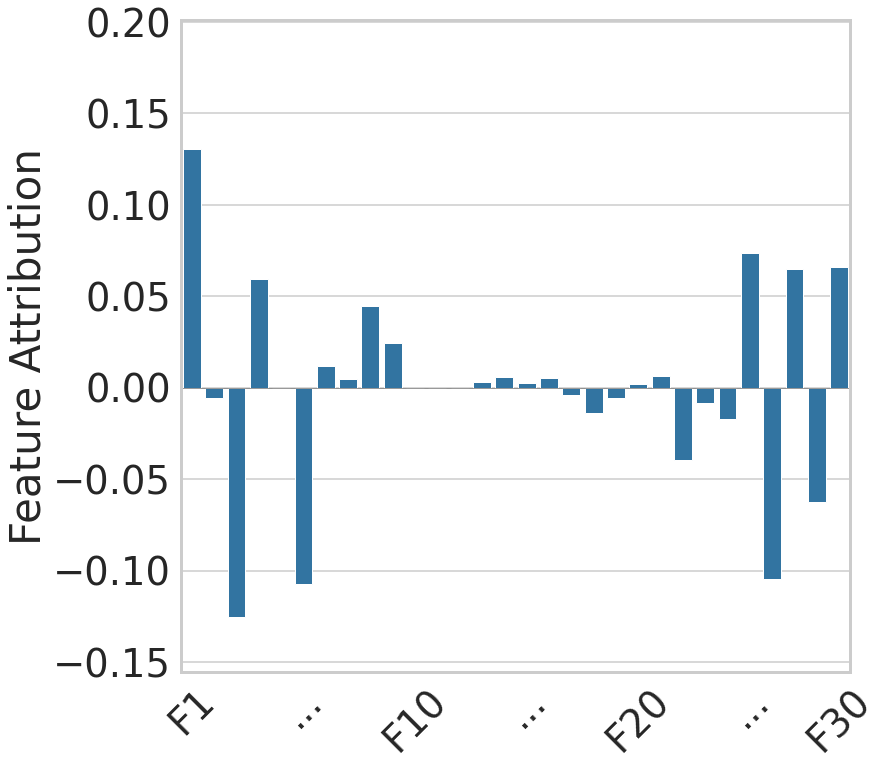

---------------------- Example 1 ----------------------
trained prediction: 1. random prediction: 0. True label: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


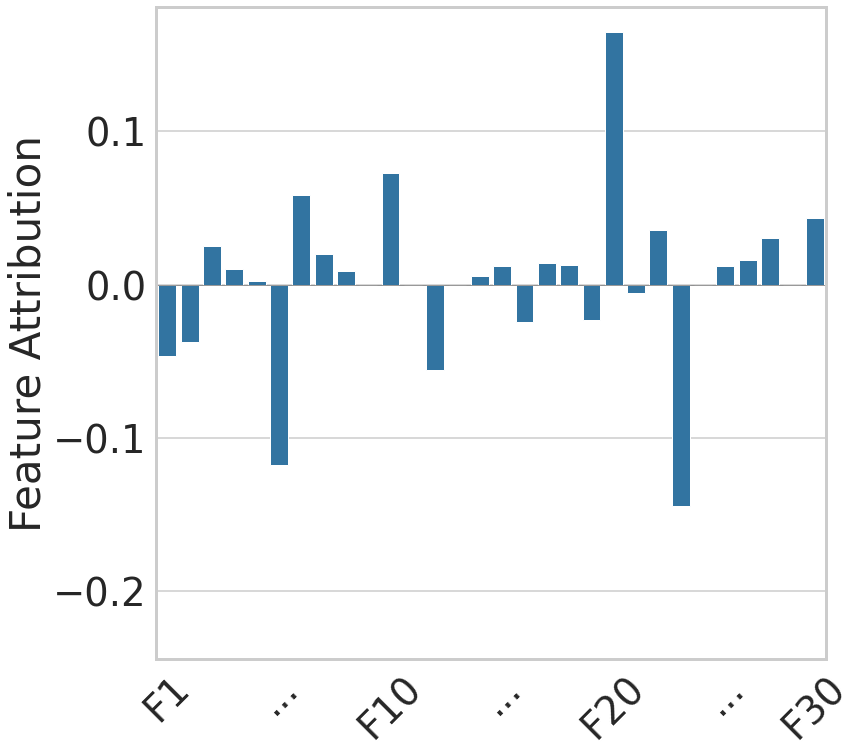

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


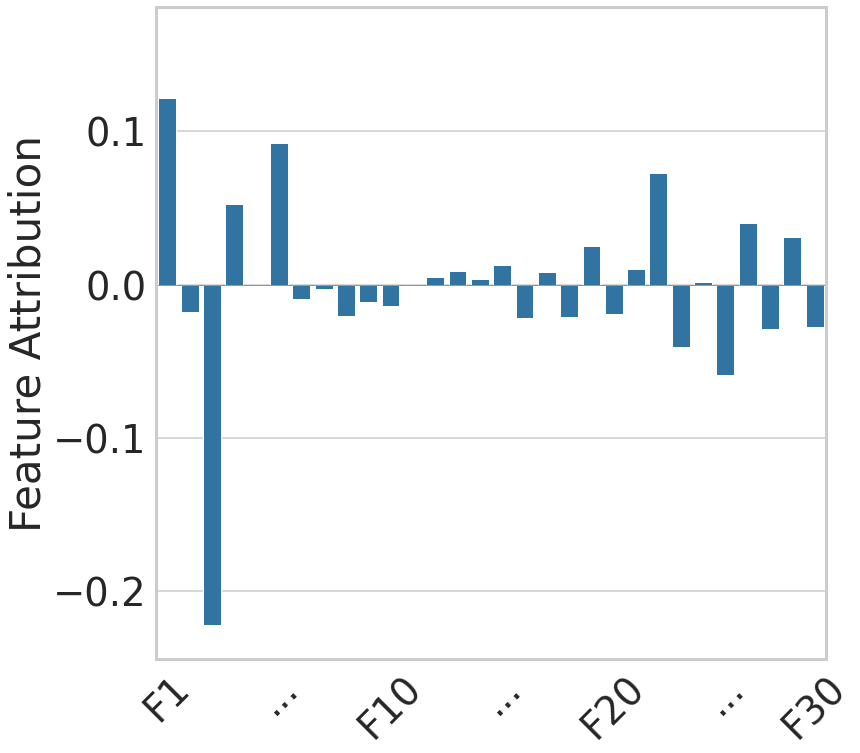

---------------------- Example 2 ----------------------
trained prediction: 1. random prediction: 1. True label: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


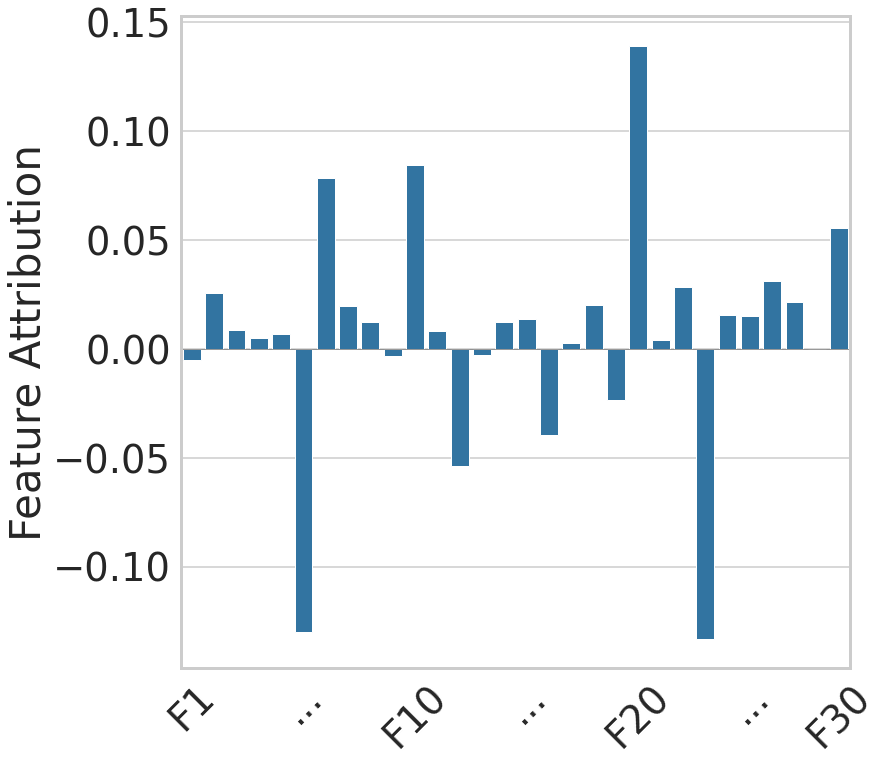

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


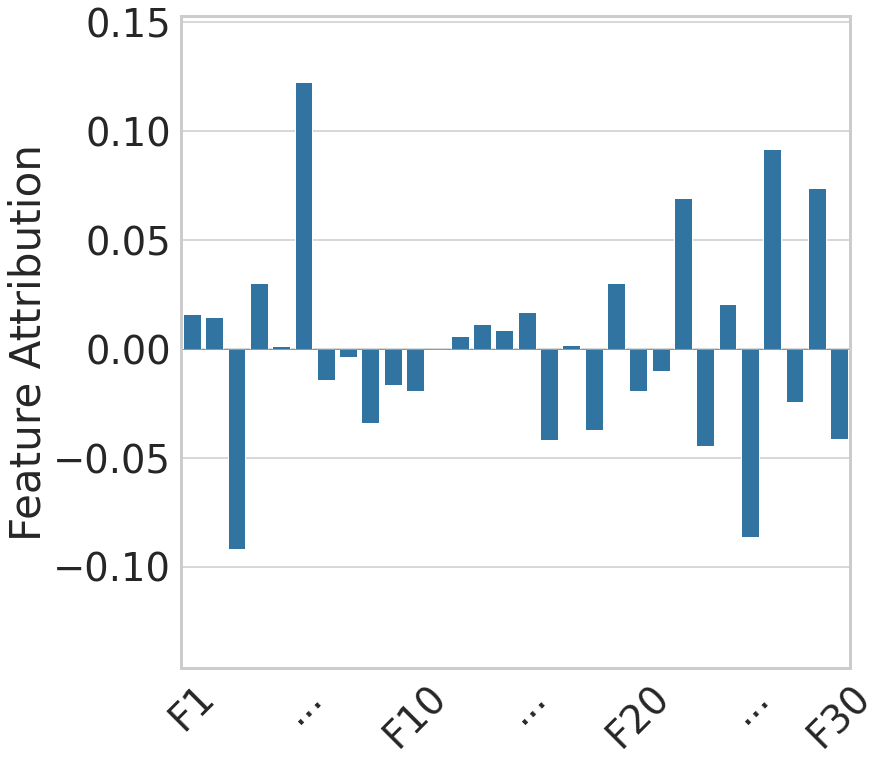

---------------------- Example 3 ----------------------
trained prediction: 1. random prediction: 1. True label: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


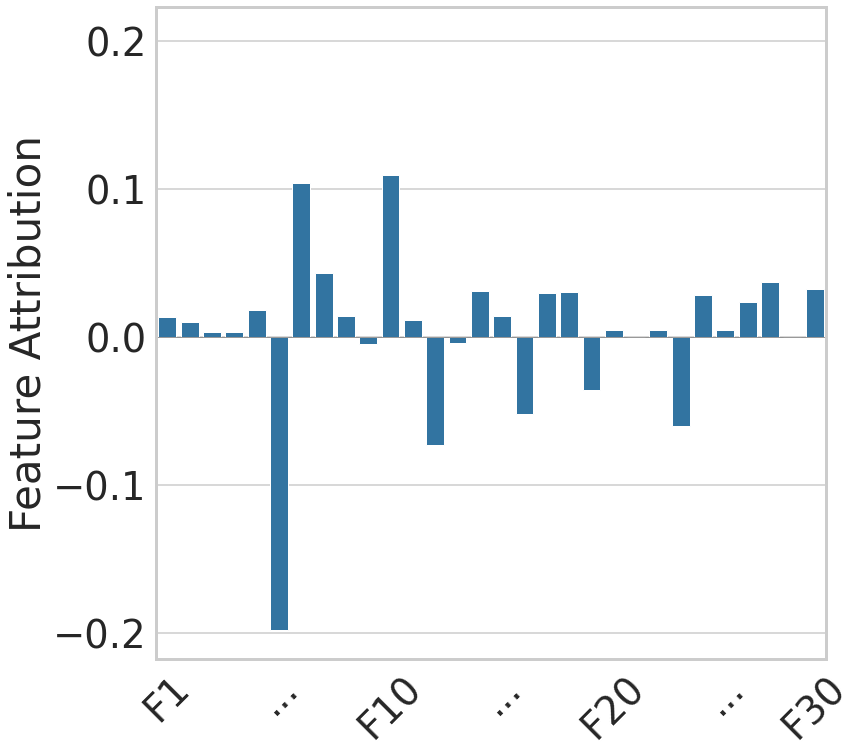

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


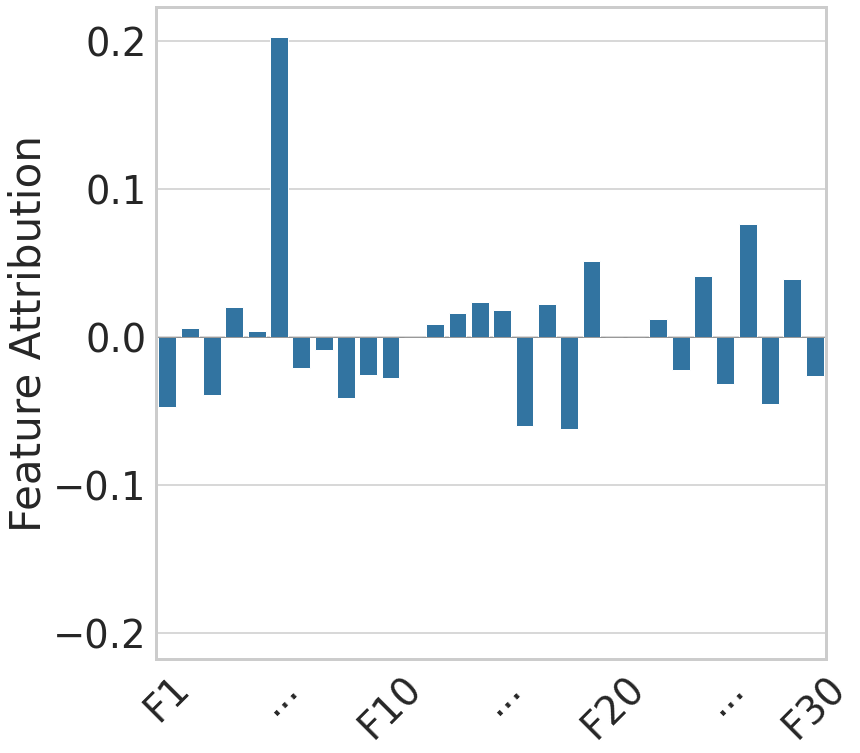

---------------------- Example 4 ----------------------
trained prediction: 1. random prediction: 1. True label: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


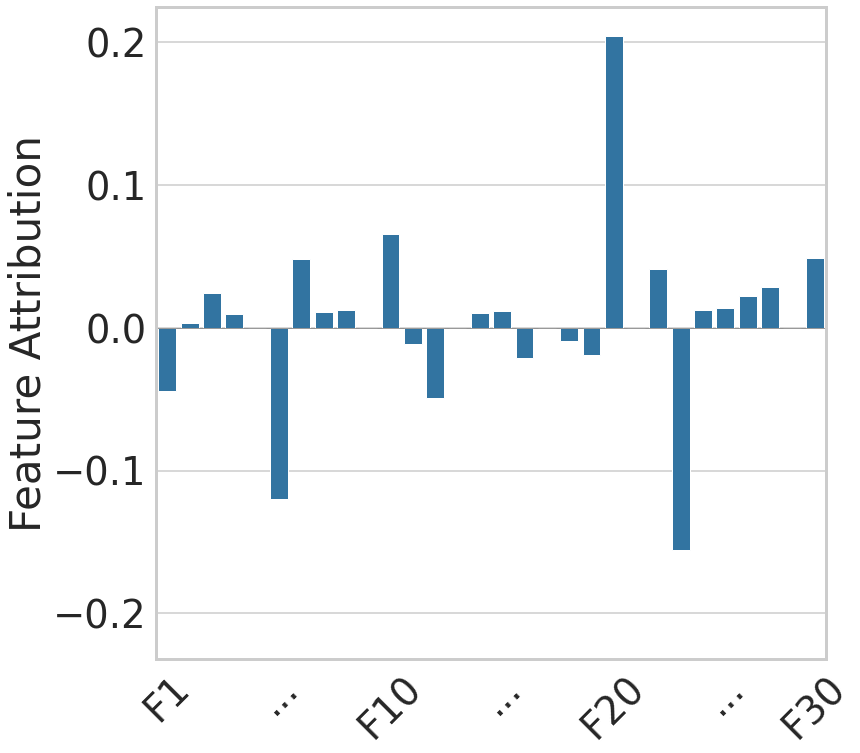

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


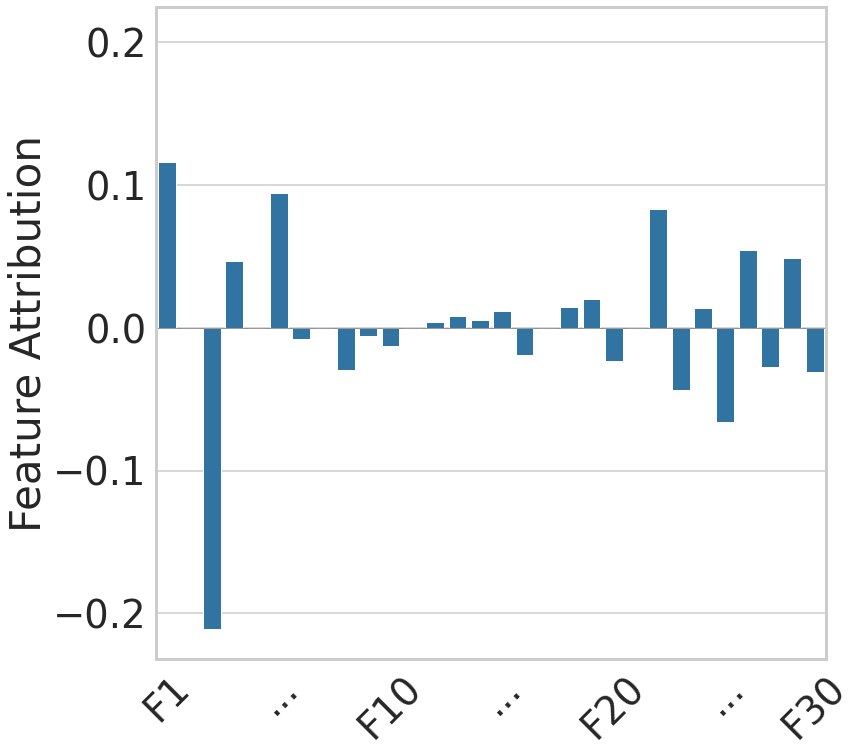

---------------------- Example 5 ----------------------
trained prediction: 1. random prediction: 0. True label: 1


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


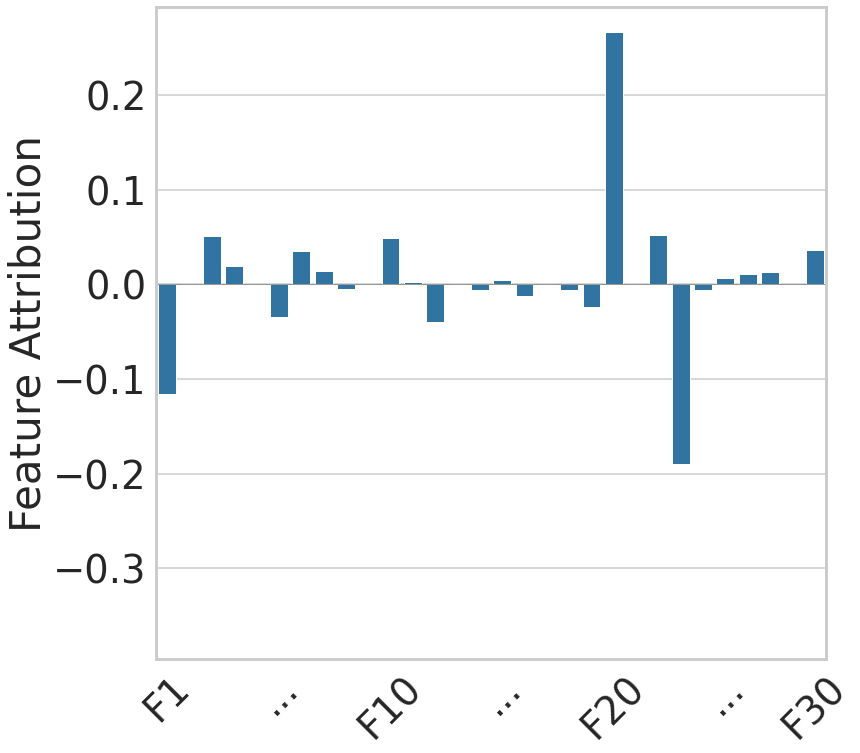

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


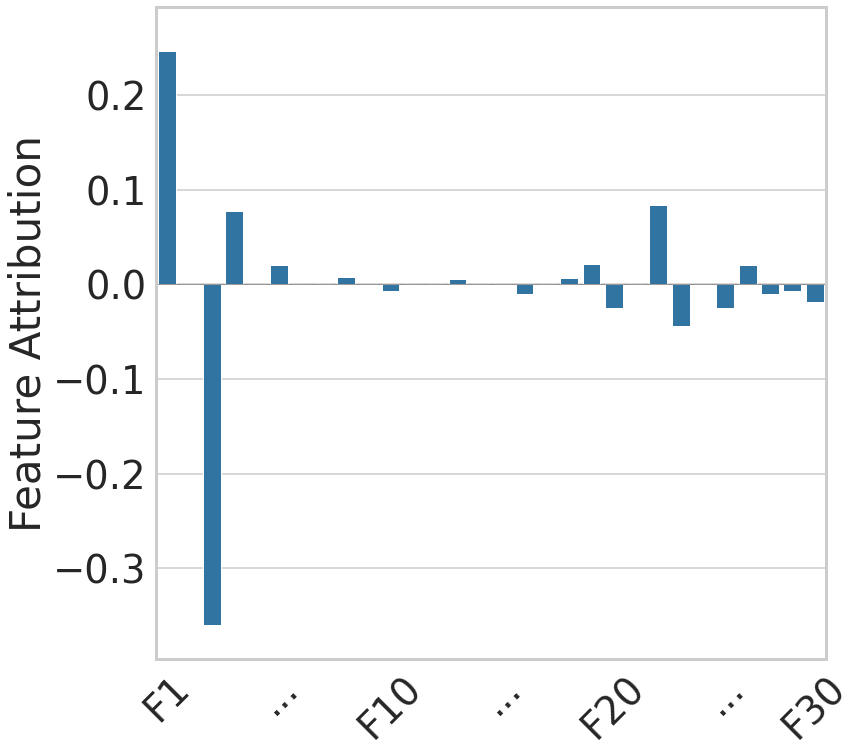

In [11]:
for i in range(min(len(Y_test), 6)):
    x = X_test[i, :]
    print(f"---------------------- Example {i} ----------------------")
    print(f"trained prediction: {int(lin_regr.predict(x.reshape((1, -1))) > 0.5)}. random prediction: {int(lin_regr_random.predict(x.reshape((1, -1))) > 0.5)}. True label: {Y_test[i]}")
    
    # real labels
    shap_values = shap_explainer.shap_values(x)
    shap_values = shap_values / np.linalg.norm(shap_values, 1)
    
    # random labels
    random_shap_values = random_shap_explainer.shap_values(x)
    random_shap_values = random_shap_values / np.linalg.norm(random_shap_values, 1)
    
    # Plots  
    ymin = 1.1*min(shap_values.min(), random_shap_values.min())
    ymax = 1.1*max(shap_values.max(), random_shap_values.max())
        
    futil.viz_feature_attributions(shap_values, y_labels, None, ylim=(ymin, ymax))
    plt.savefig(f'figures/cancer/{i}_lr_trained.pdf', bbox_inches='tight', facecolor='white')
    plt.show()
    futil.viz_feature_attributions(random_shap_values, y_labels, None, ylim=(ymin, ymax))
    plt.savefig(f'figures/cancer/{i}_lr_random.pdf', bbox_inches='tight', facecolor='white')
    plt.show()

## For the linear regressor, there exist many counterfactual explanations in a single variable

#### We demonstrate this by plotting the value of the function as we walk in the direction of the feature, for all 30 features
#### If we cross the value 0.5, we have a counterfactual explanation in that feature

--- Example 0 ---


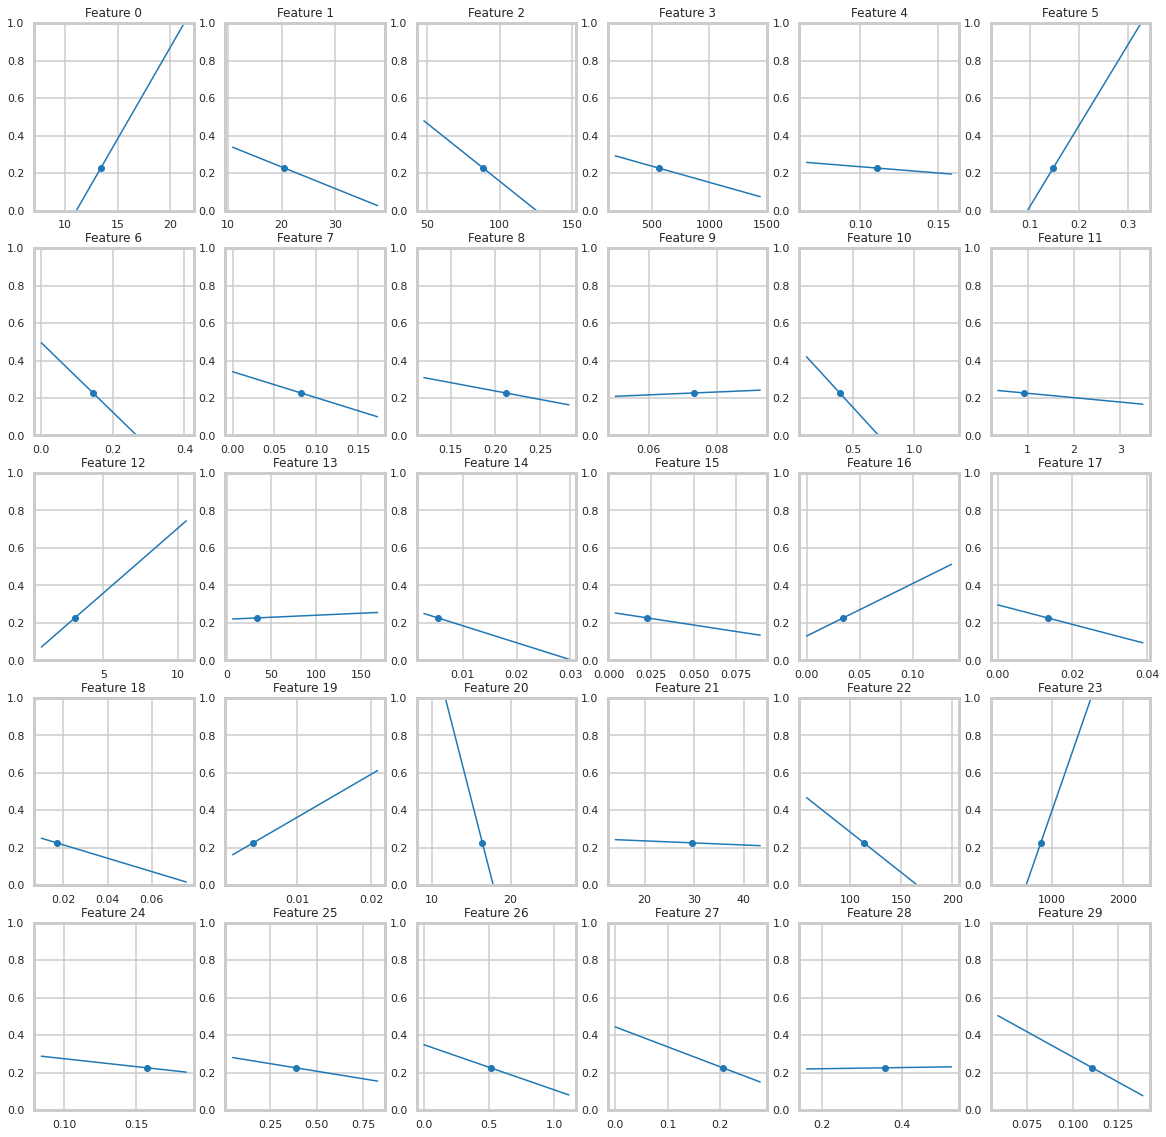

--- Example 1 ---


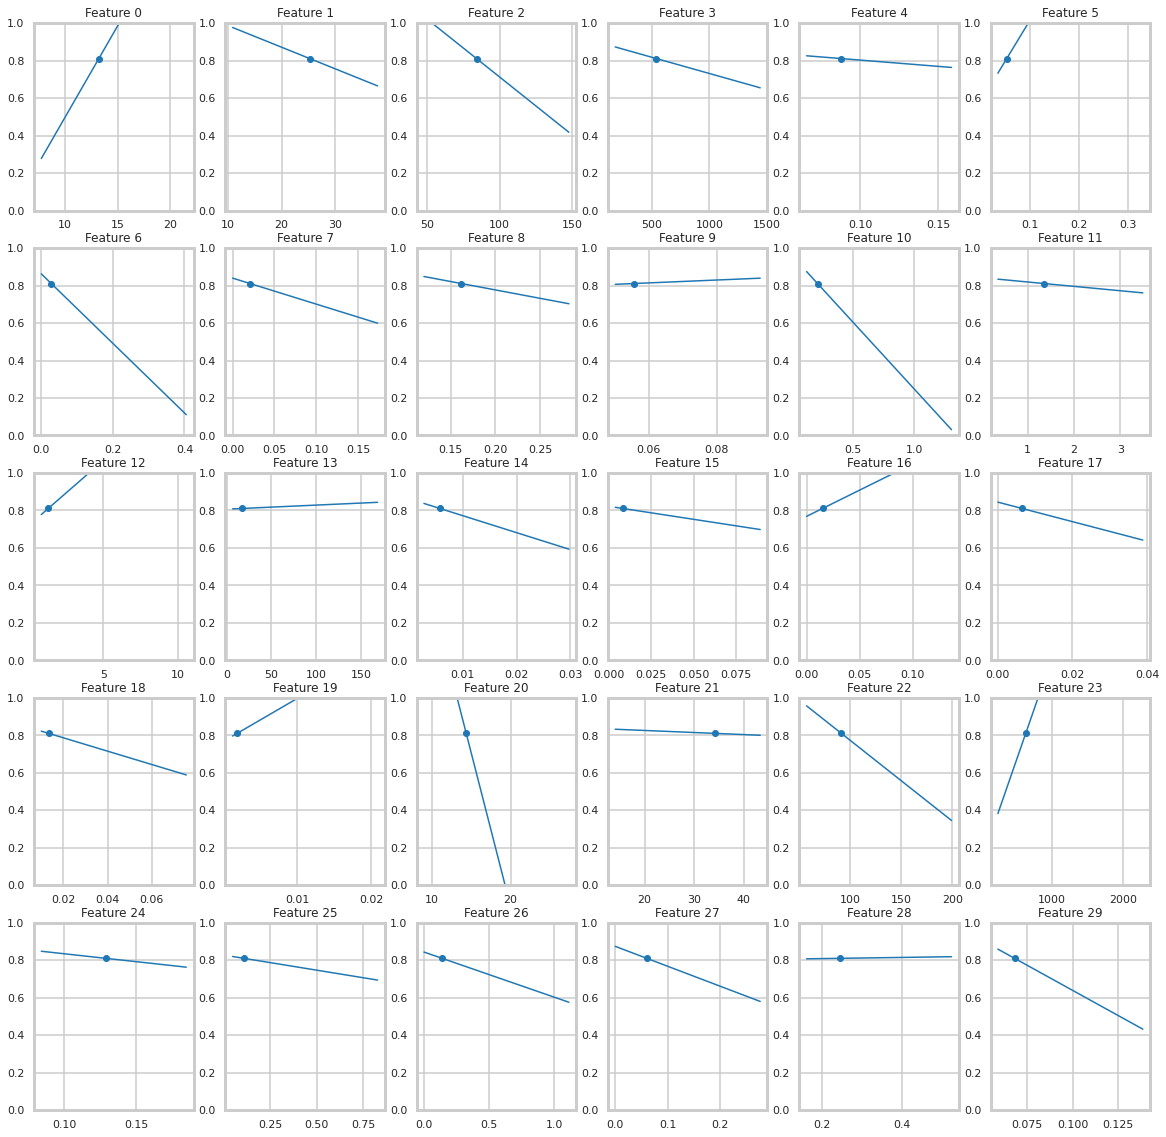

--- Example 2 ---


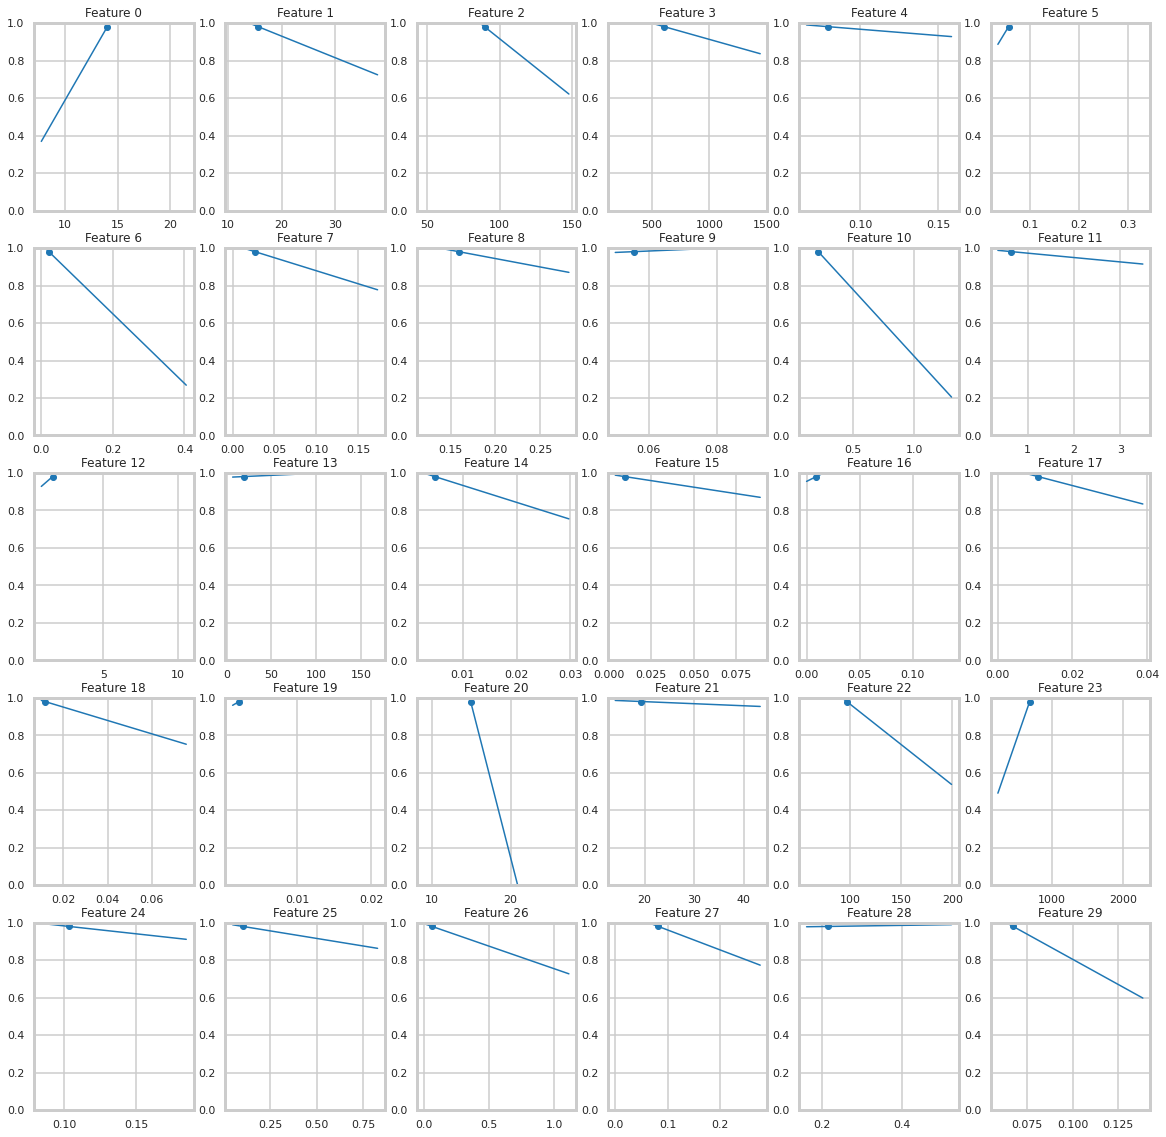

--- Example 3 ---


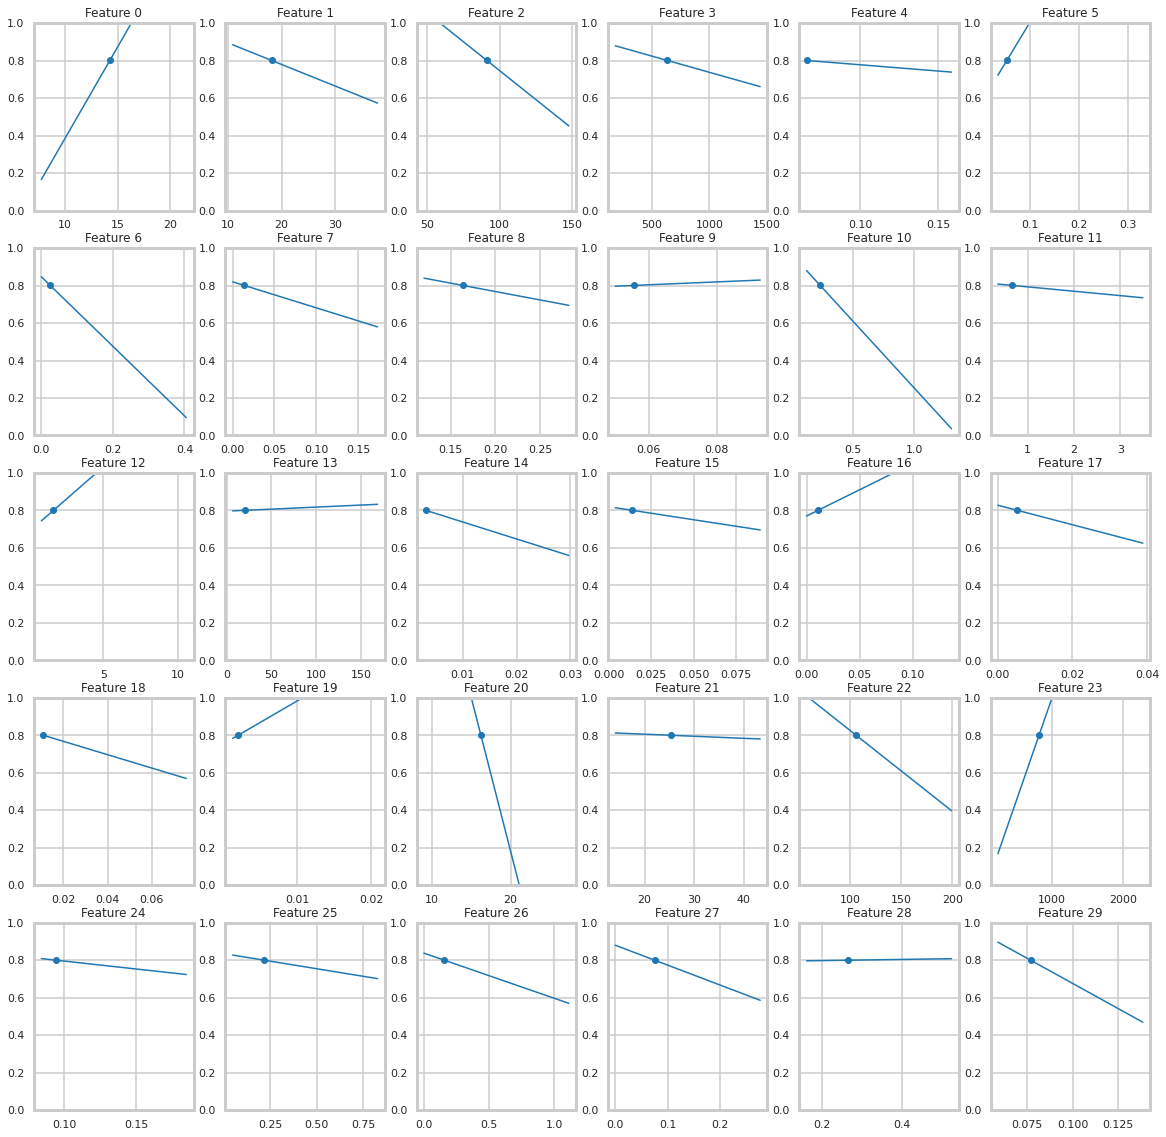

--- Example 4 ---


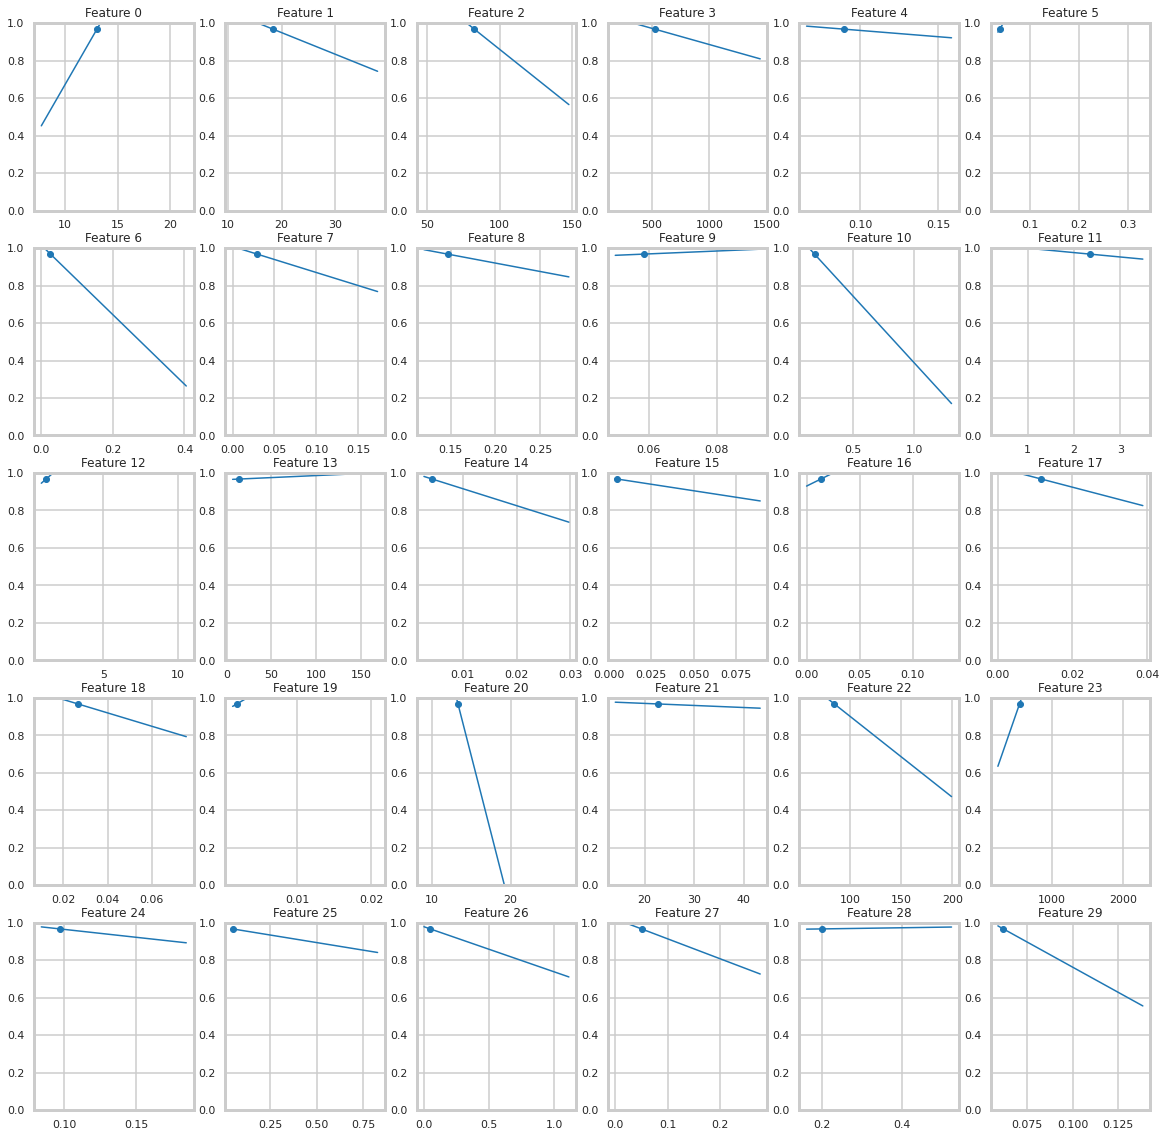

In [18]:
sns.set_context("notebook", rc={'axes.linewidth': 3, 'grid.linewidth': 1.5},  font_scale=1)

for i in range(5):
    print(f'--- Example {i} ---')
    x = X_test[i, :].reshape(1, -1)
    _, axs = plt.subplots(5, 6, figsize=(20, 20))
    for ifeature in range(30):
        feature = X_test[:, ifeature]
        xx = np.arange(feature.min(), feature.max(), feature.ptp()/20)
        yy = []
        for fval in xx:
            cx = np.copy(x)
            cx[0, ifeature] = fval
            yy.append(lin_regr.predict(cx)[0])
        axs[ifeature // 6, ifeature % 6].plot(xx, yy)
        axs[ifeature // 6, ifeature % 6].scatter(x[0, ifeature], lin_regr.predict(x)[0])
        axs[ifeature // 6, ifeature % 6].set_ylim([0, 1])
        axs[ifeature // 6, ifeature % 6].set_title(f'Feature {ifeature}')
    plt.show()

### Train a random forest

In [20]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500, random_state=0)
rf.fit(X_train, Y_train)
sklearn.metrics.accuracy_score(Y_test, rf.predict(X_test))

0.9649122807017544

### For the random forest, there are no counterfactual explanations in a single variable

--- Example 0 ---


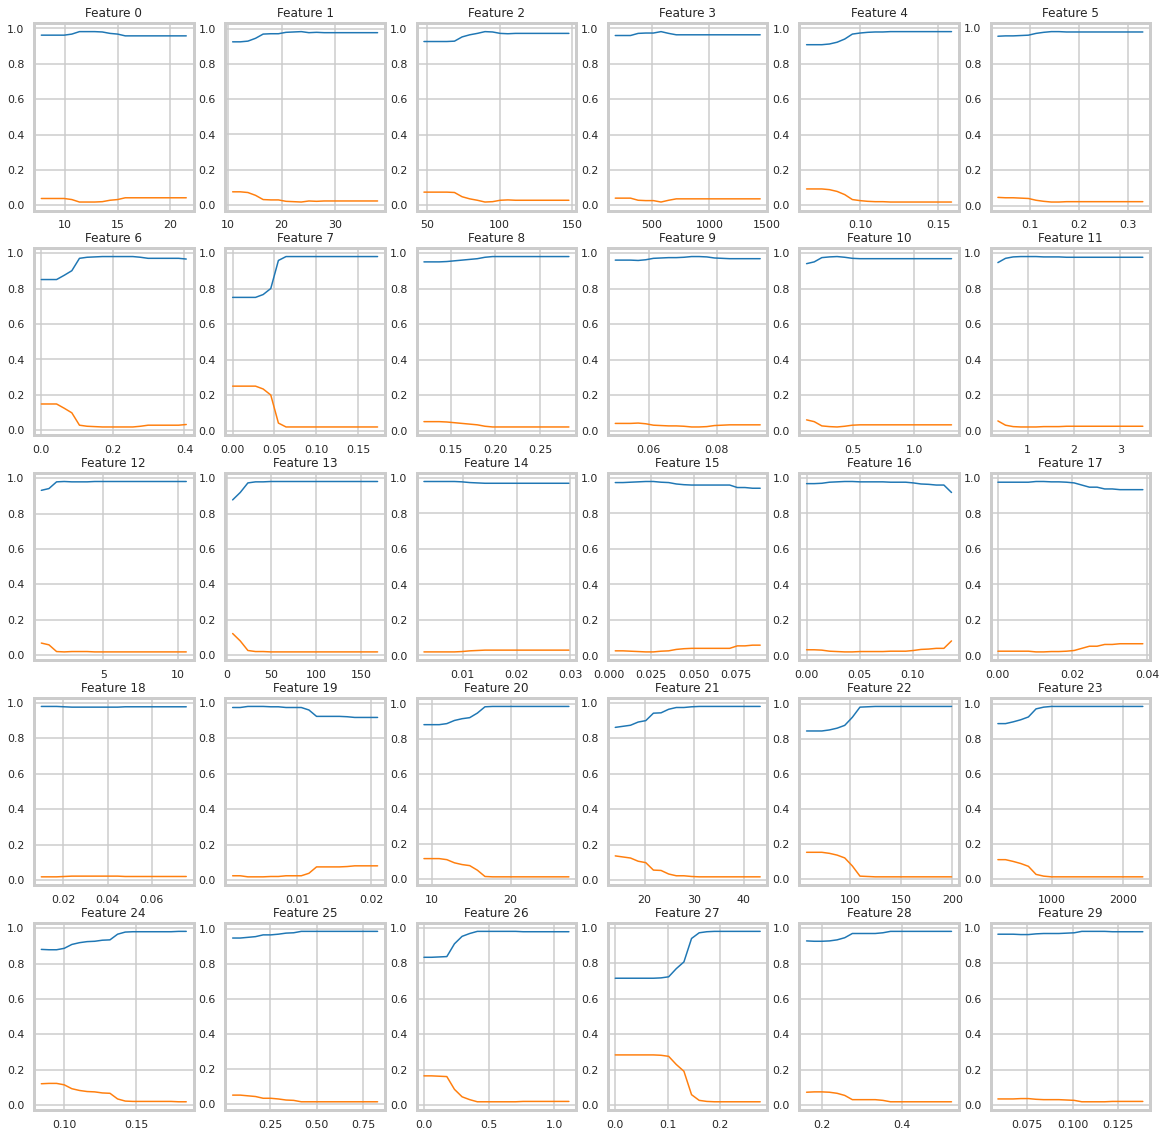

--- Example 1 ---


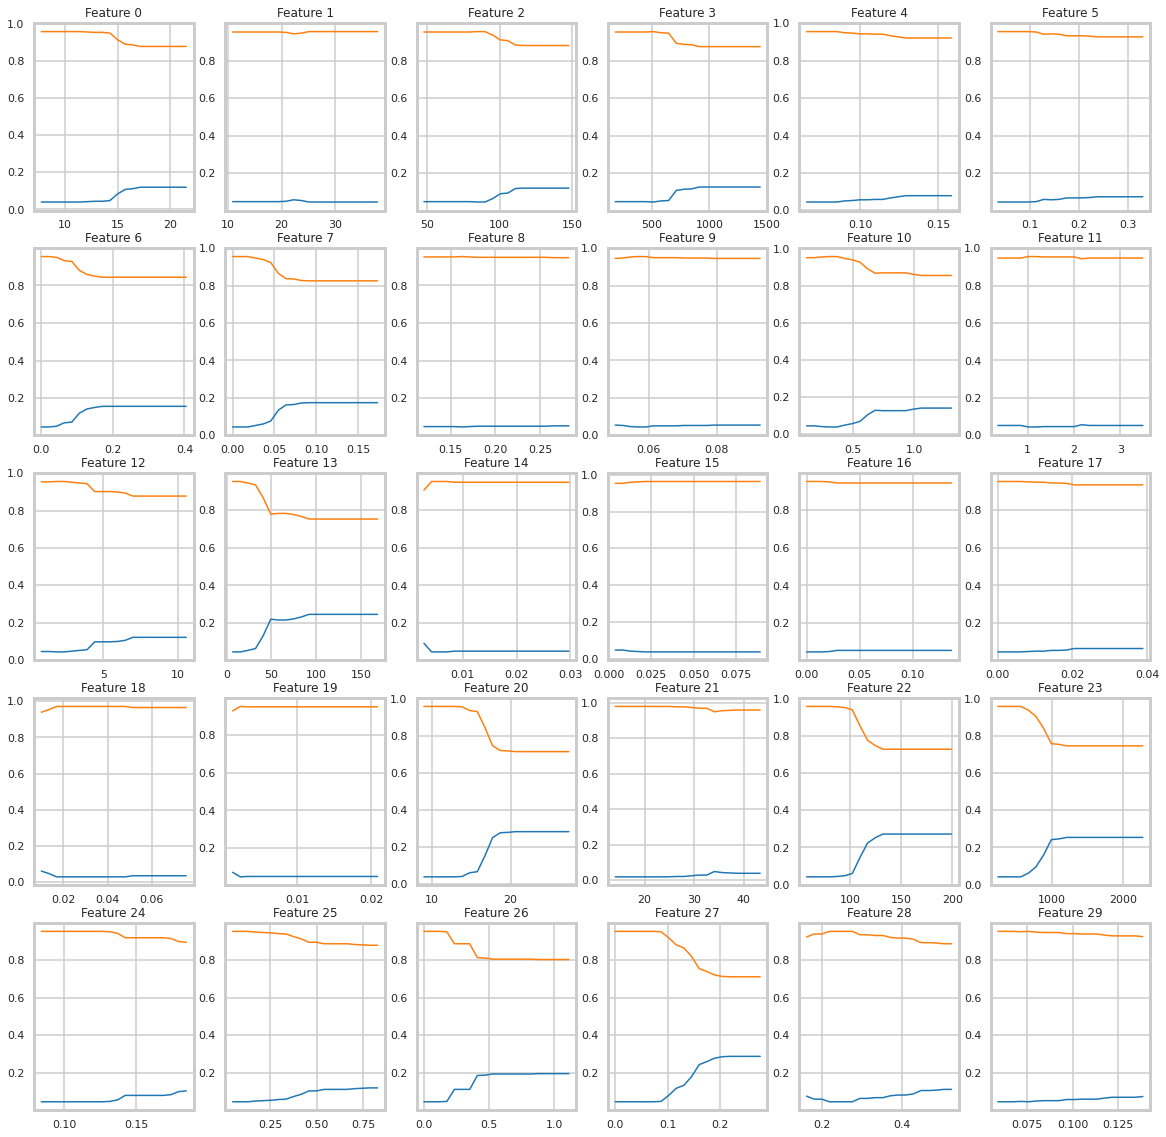

--- Example 2 ---


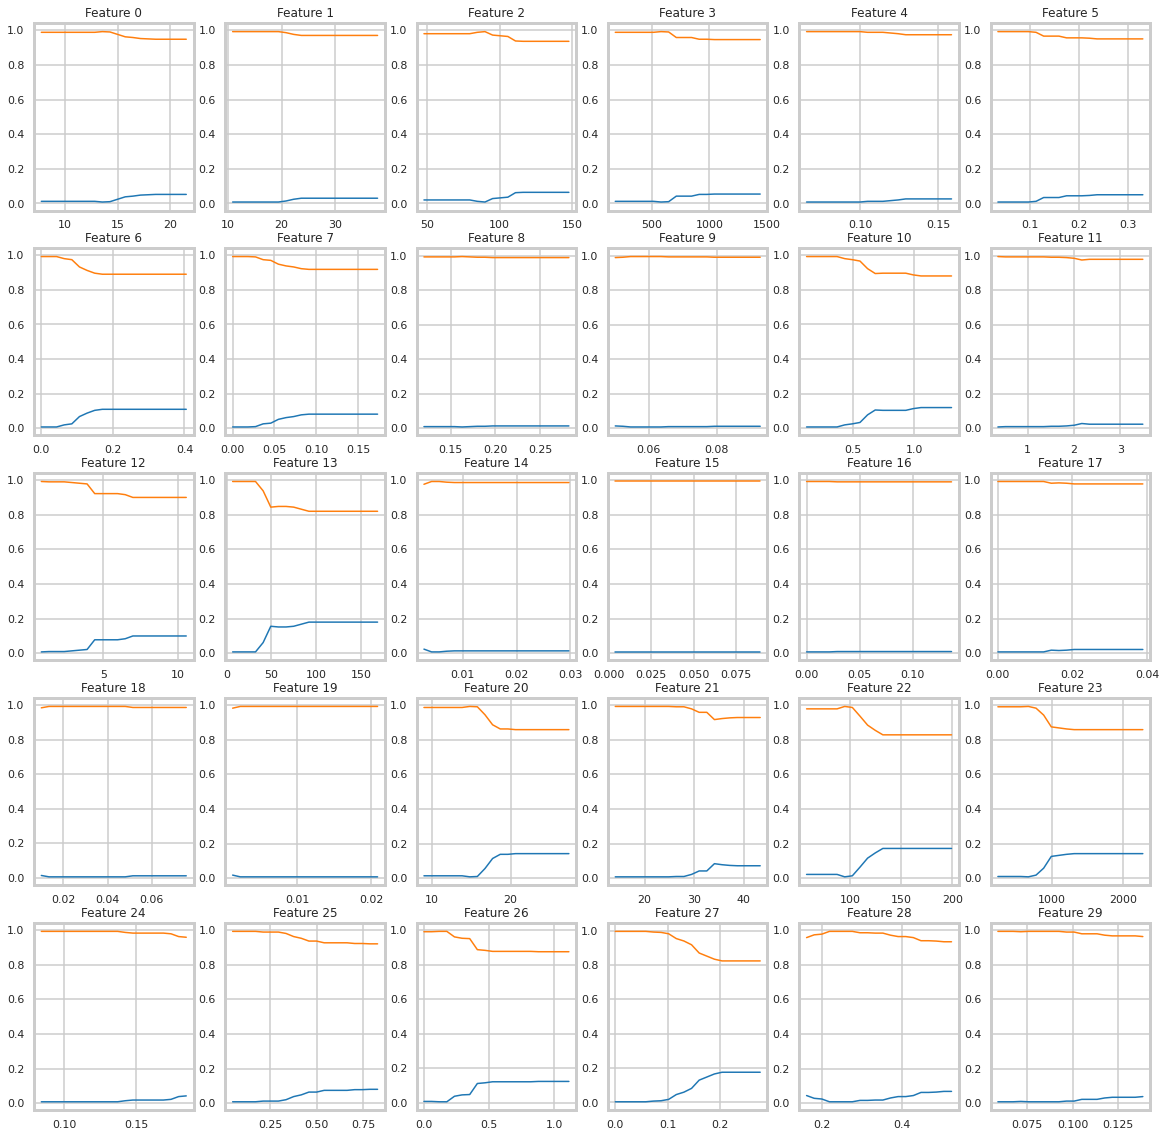

--- Example 3 ---


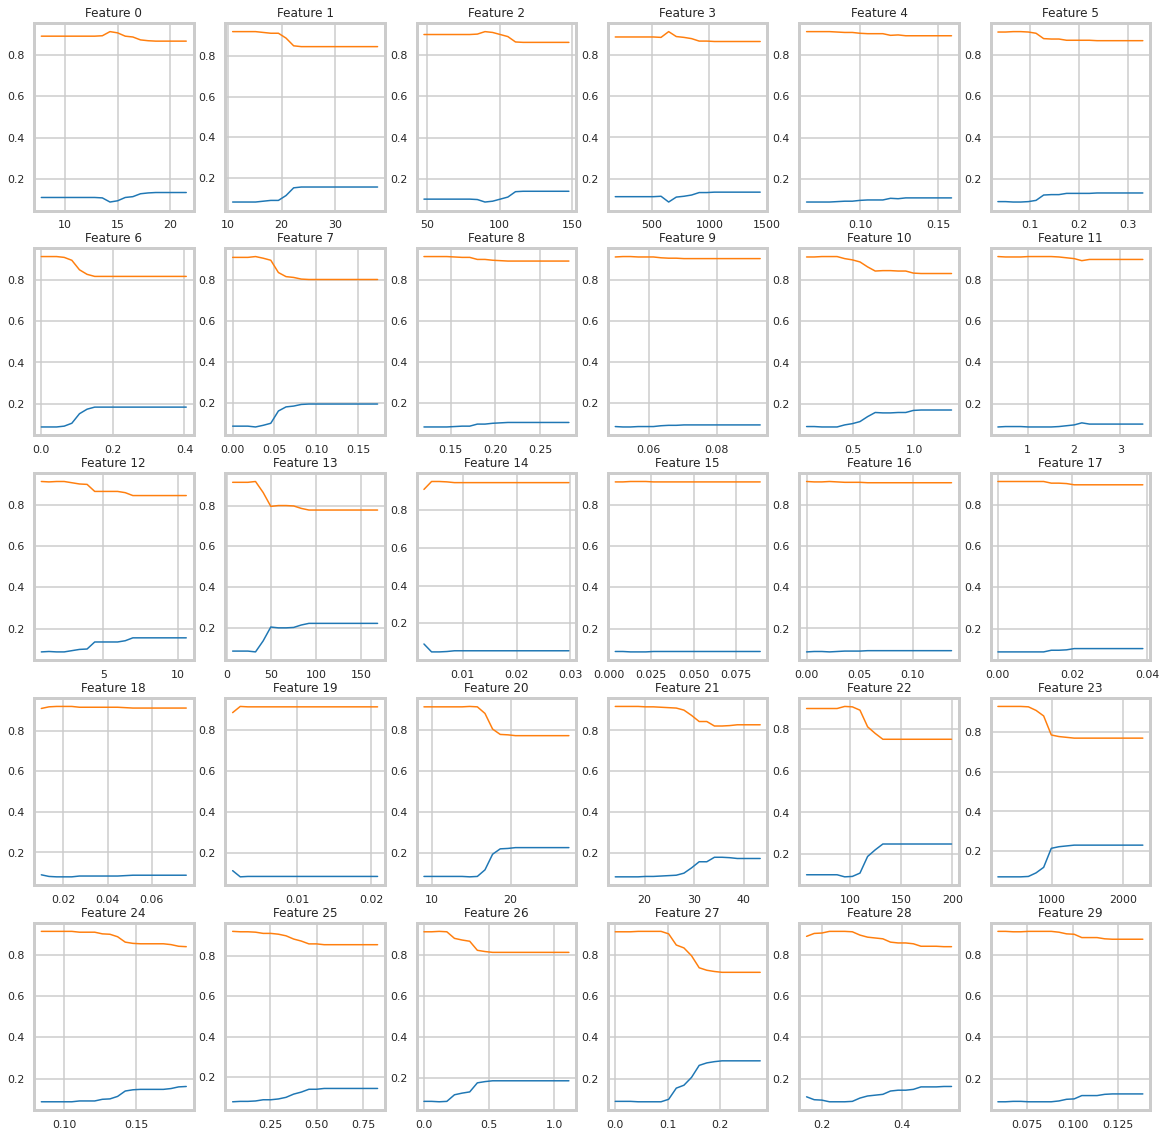

--- Example 4 ---


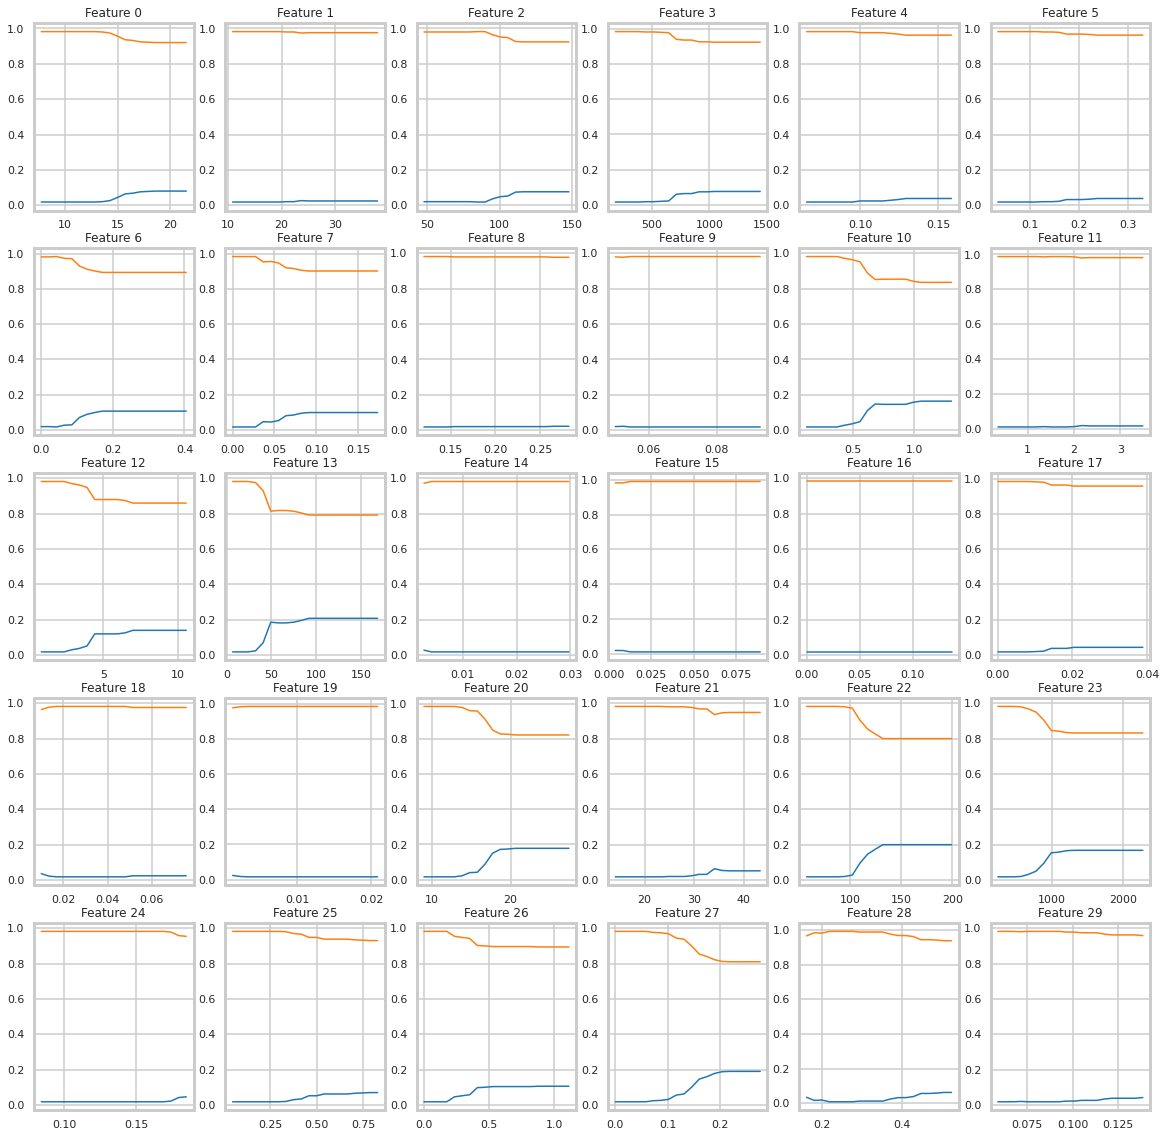

In [21]:
sns.set_context("notebook", rc={'axes.linewidth': 3, 'grid.linewidth': 1.5},  font_scale=1)

for i in range(5):
    print(f'--- Example {i} ---')
    x = X_test[i, :].reshape(1, -1)
    _, axs = plt.subplots(5, 6, figsize=(20, 20))
    for ifeature in range(30):
        feature = X_test[:, ifeature]
        xx = np.arange(feature.min(), feature.max(), feature.ptp()/20)
        yy = []
        for fval in xx:
            cx = np.copy(x)
            cx[0, ifeature] = fval
            yy.append(rf.predict_proba(cx)[0])
        axs[ifeature // 6, ifeature % 6].plot(xx, yy)
        axs[ifeature // 6, ifeature % 6].set_title(f"Feature {ifeature}")
    plt.show()